/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.


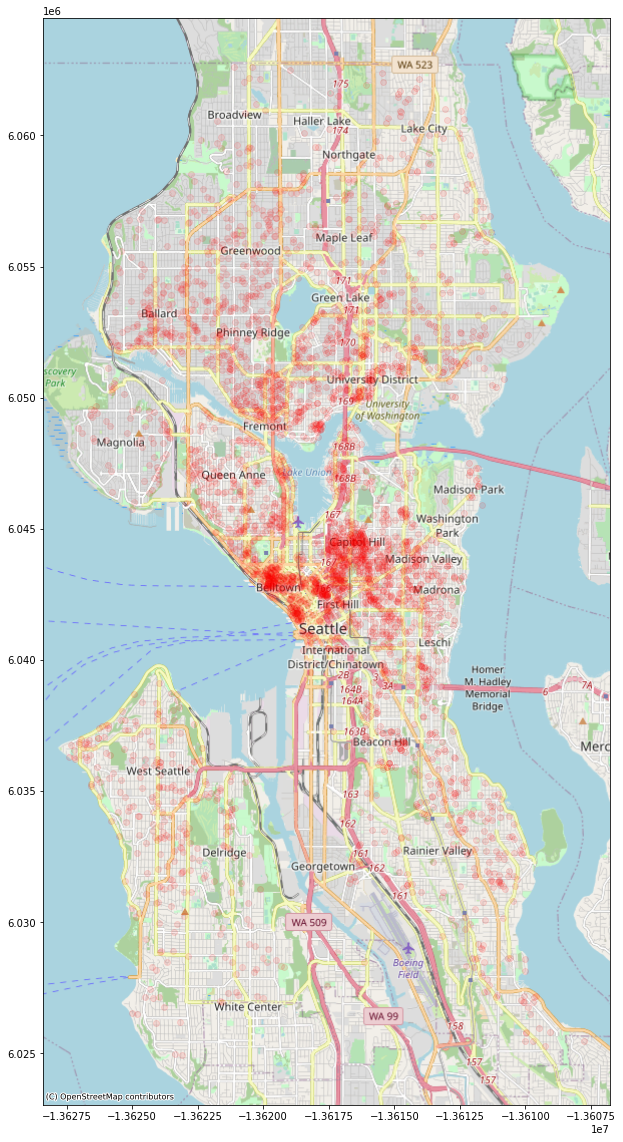

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
from datetime import *
import re
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx
%matplotlib inline

# widgets 
from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

# reading shapefile for Seattle
directory = "/Users/nassimgharbi/Documents/Udacity-Data-Science_Nano/Week-1_Intro_to_Data_Science/Data_sets/Airbnb/Seattle/City_Clerk_Neighborhoods-shp/"
seattle_map = gpd.read_file(directory+"City_Clerk_Neighborhoods.shp")

# reading dataframe for Seattle
directory = "/Users/nassimgharbi/Documents/Udacity-Data-Science_Nano/Week-1_Intro_to_Data_Science/Data_sets/Airbnb/Seattle/"
df = pd.read_csv(directory+"listings.csv")

# creating geopandas dataframe for Seattle
crs = {'init':"epsg:4326"}
long, lat = ["longitude", "latitude"]

geometry = [Point(xy)for xy in zip(df[long],df[lat])]

geo_df = gpd.GeoDataFrame(df,crs=crs, geometry=geometry)
geo_df  = geo_df.to_crs(epsg=3857)

# plotting map
fig, ax = plt.subplots(figsize=(25,20))
geo_df.plot(ax = ax, color="red", alpha=.1)
#seattle_map.plot(ax = ax, color="grey", alpha=.1)
ctx.add_basemap(ax, url=ctx.providers.OpenStreetMap.Mapnik)
#ax.set_axis_off()



In [2]:
# merging datasets to use # of reviews for mapping
df_reviews = pd.read_csv(directory+"reviews.csv")
df_reviews = pd.merge(df_reviews,df.loc[:,("id","longitude","latitude")] , how="left", left_on= "listing_id", right_on = "id" )



In [ ]:
# creating interactive map w/ slider
def create_interactive_map(year=2009):
    
    
    """
    The function takes year from slider input and prints geodata on a map. 

    Parameters: 
        year (int): The year to show datapoints for.

    """
        
    df = df_reviews.copy()
    df["date"] = pd.to_datetime(df["date"])
    
    df = df[(df["date"] <= str(year)+"-12-31") & (df["date"] >= str(year)+"-01-01") ]
    
    crs = {'init':"epsg:4326"}
    long, lat = ["longitude", "latitude"]

    geometry = [Point(xy)for xy in zip(df[long],df[lat])]

    geo_df = gpd.GeoDataFrame(df,crs=crs, geometry=geometry)
    geo_df  = geo_df.to_crs(epsg=3857)

    fig, ax = plt.subplots(figsize=(15,10))
    geo_df.plot(ax = ax, color="red", alpha=.1)
    #seattle_map.plot(ax = ax, color="grey", alpha=.1)
    ctx.add_basemap(ax, url=ctx.providers.OpenStreetMap.Mapnik)
    ax.set_axis_off()
    
    print("{} reviews for {} listings in {}".format(df.shape[0],df.listing_id.nunique(),year))
    return 
    


interact(create_interactive_map, year=(2009,2015,1));

interactive(children=(IntSlider(value=2009, description='year', max=2015, min=2009), Output()), _dom_classes=(…

In [ ]:
# creating & saving gif
import imageio

def create_gif(year=2009):
    
    """
    The function renders gif for yearly number of reviews in Seattle. 

    Parameters: 
        year (int): The year to show datapoints for.

    """
        
        
    df = df_reviews.copy()
    df["date"] = pd.to_datetime(df["date"])
    
    df = df[(df["date"] <= str(year)+"-12-31") & (df["date"] >= str(year)+"-01-01") ]
    
    crs = {'init':"epsg:4326"}
    long, lat = ["longitude", "latitude"]

    geometry = [Point(xy)for xy in zip(df[long],df[lat])]

    geo_df = gpd.GeoDataFrame(df,crs=crs, geometry=geometry)
    geo_df  = geo_df.to_crs(epsg=3857)

    fig, ax = plt.subplots(figsize=(15,10))
    geo_df.plot(ax = ax, color="red", alpha=.1)
    ctx.add_basemap(ax, url=ctx.providers.OpenStreetMap.Mapnik)
    ax.set_axis_off()
    
    
    # IMPORTANT ANIMATION CODE HERE
    # Used to keep the limits constant


    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))


    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./seattle_animation.gif', [create_gif(year = i) for i in range(2009,2015)], fps=1)

